In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# The path to our csv file 
data_table_path = r"C:\Users\aspyn\Downloads\data-table.csv"
poorest_states_2024_path = r"C:\Users\aspyn\Downloads\poorest-states-2024.csv"

# Read our data into pandas
data_table_df = pd.read_csv(data_table_path)
poorest_states_2024_df = pd.read_csv(poorest_states_2024_path)

data_table_df.head()

,YEAR,STATE,RATE,DEATHS,URL
0,2021,AL,7.56,439,/nchs/pressroom/states/alabama/al.htm
1,2021,AK,7.37,69,/nchs/pressroom/states/alaska/ak.htm
2,2021,AZ,5.47,426,/nchs/pressroom/states/arizona/az.htm
3,2021,AR,8.59,309,/nchs/pressroom/states/arkansas/ar.htm
4,2021,CA,4.07,1713,/nchs/pressroom/states/california/ca.htm


In [3]:
# Display the first 5 rows of the poorest states DataFrame
poorest_states_2024_df.head()

,state,MedianHouseholdIncome2021
0,Alabama,53913.0
1,Alaska,77845.0
2,Arizona,69056.0
3,Arkansas,52528.0
4,California,84907.0


In [4]:
# Convert 'RATE' column to numeric, coerce errors to NaN
data_table_df['RATE'] = pd.to_numeric(data_table_df['RATE'], errors='coerce')

# Group the data by the 'YEAR' column and calculate the average rate for each year
average_rates = data_table_df.groupby('YEAR')['RATE'].mean()

# Drop NaN values if needed
average_rates = average_rates.dropna()

# Find the highest and lowest average rates
highest_average_rate = average_rates.max()
lowest_average_rate = average_rates.min()

# Find the years with the highest and lowest average rates
year_highest_rate = average_rates.idxmax()
year_lowest_rate = average_rates.idxmin()

print("Highest Average Rate (Year):", year_highest_rate, "Rate:", highest_average_rate)
print("Lowest Average Rate (Year):", year_lowest_rate, "Rate:", lowest_average_rate)

Highest Average Rate (Year): 2015 Rate: 6.1152
Lowest Average Rate (Year): 2020 Rate: 5.4910000000000005


In [5]:
# Group the data by the 'STATE' column and calculate the average rate for each state
state_average_rates = data_table_df.groupby('STATE')['RATE'].mean()

# Display the state-wise average rates
print(state_average_rates)

STATE
AK    6.02125
AL    7.82375
AR    7.72375
AZ    5.54875
CA    4.20000
CO    4.76125
CT    4.66500
DE    6.52375
FL    6.05375
GA    7.07000
HI    5.37875
IA    4.83500
ID    4.99375
IL    6.05250
IN    6.97000
KS    5.98125
KY    6.34000
LA    7.57125
MA    3.91500
MD    6.20375
ME    5.88500
MI    6.47500
MN    4.83250
MO    6.21125
MS    8.70750
MT    5.29250
NC    6.97250
ND    5.55000
NE    5.53125
NH    3.93125
NJ    4.14250
NM    5.46500
NV    5.56500
NY    4.40500
OH    7.03250
OK    7.23875
OR    4.67000
PA    5.88625
RI    5.15125
SC    6.84750
SD    6.48625
TN    6.85875
TX    5.58375
UT    5.25250
VA    5.80500
VT    3.97000
WA    4.42250
WI    5.93625
WV    6.93375
WY    5.50875
Name: RATE, dtype: float64


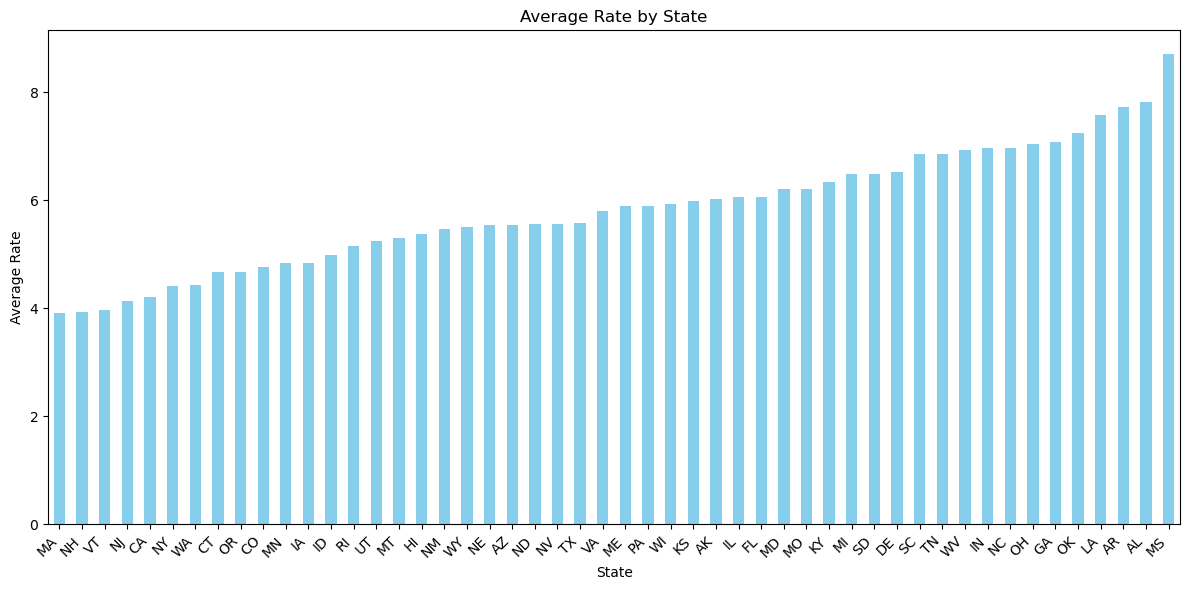

In [6]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
state_average_rates.sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Rate by State')
plt.xlabel('State')
plt.ylabel('Average Rate')
plt.xticks(rotation=45, ha='right')  # Rotate state names for better readability
plt.tight_layout()
plt.show()

In [7]:
# Find the state with the highest average rate
highest_average_state = state_average_rates.idxmax()
highest_average_rate = state_average_rates.max()

# Find the state with the lowest average rate
lowest_average_state = state_average_rates.idxmin()
lowest_average_rate = state_average_rates.min()

print("State with the Highest Average Rate:", highest_average_state, "Rate:", highest_average_rate)
print("State with the Lowest Average Rate:", lowest_average_state, "Rate:", lowest_average_rate)

State with the Highest Average Rate: MS Rate: 8.7075
State with the Lowest Average Rate: MA Rate: 3.915


In [8]:
# Display the top 10 states with the highest average rates
top_10_states = state_average_rates.nlargest(10)
print("Top 10 States with the Highest Average Rates:")
print(top_10_states)

Top 10 States with the Highest Average Rates:
STATE
MS    8.70750
AL    7.82375
AR    7.72375
LA    7.57125
OK    7.23875
GA    7.07000
OH    7.03250
NC    6.97250
IN    6.97000
WV    6.93375
Name: RATE, dtype: float64


In [9]:
# Display the bottom 10 states with the lowest average rates
bottom_10_states = state_average_rates.nsmallest(10)
print("Bottom 10 States with the Lowest Average Rates:")
print(bottom_10_states)

Bottom 10 States with the Lowest Average Rates:
STATE
MA    3.91500
NH    3.93125
VT    3.97000
NJ    4.14250
CA    4.20000
NY    4.40500
WA    4.42250
CT    4.66500
OR    4.67000
CO    4.76125
Name: RATE, dtype: float64


In [10]:
# Sort the DataFrame by "MedianHouseholdIncome2021" column in descending order
sorted_by_income = poorest_states_2024_df.sort_values(by="MedianHouseholdIncome2021", ascending=False)

# Display the sorted DataFrame
print(sorted_by_income[["state", "MedianHouseholdIncome2021"]])

                   state  MedianHouseholdIncome2021
20              Maryland               90203.000000
8   District of Columbia               90088.000000
21         Massachusetts               89645.000000
30            New Jersey               89296.000000
29         New Hampshire               88465.000000
4             California               84907.000000
11                Hawaii               84857.000000
47            Washington               84247.000000
6            Connecticut               83771.000000
5               Colorado               82254.000000
46              Virginia               80963.000000
44                  Utah               79449.000000
1                 Alaska               77845.000000
23             Minnesota               77720.000000
32              New York               74314.000000
39          Rhode Island               74008.000000
45               Vermont               72431.000000
13              Illinois               72205.000000
37          

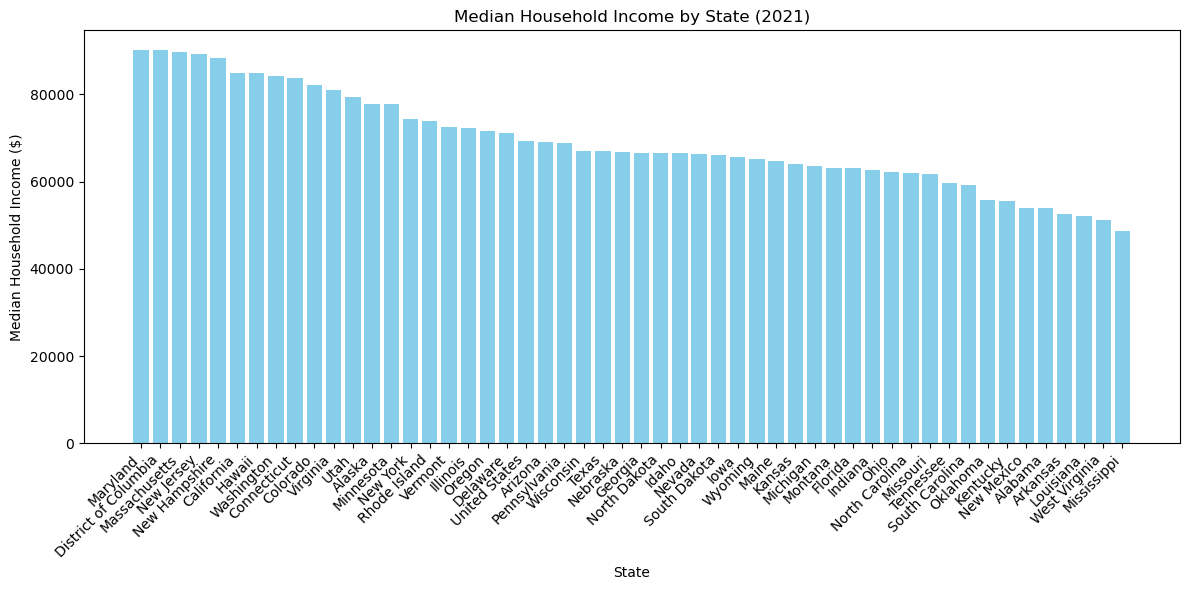

In [11]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_by_income["state"], sorted_by_income["MedianHouseholdIncome2021"], color='skyblue')
plt.title('Median Household Income by State (2021)')
plt.xlabel('State')
plt.ylabel('Median Household Income ($)')
plt.xticks(rotation=45, ha='right')  # Rotate state names for better readability
plt.tight_layout()
plt.show()

In [12]:
# Sort the DataFrame by "MedianHouseholdIncome2021" column in descending order
sorted_by_income = poorest_states_2024_df.sort_values(by="MedianHouseholdIncome2021", ascending=False)

# Get the highest five states
highest_five = sorted_by_income.head(5)

# Get the lowest five states
lowest_five = sorted_by_income.tail(5)

# Display the highest five and lowest five states
print("Highest Five States:")
print(highest_five[["state", "MedianHouseholdIncome2021"]])

print("\nLowest Five States:")
print(lowest_five[["state", "MedianHouseholdIncome2021"]])

Highest Five States:
                   state  MedianHouseholdIncome2021
20              Maryland                    90203.0
8   District of Columbia                    90088.0
21         Massachusetts                    89645.0
30            New Jersey                    89296.0
29         New Hampshire                    88465.0

Lowest Five States:
            state  MedianHouseholdIncome2021
0         Alabama                    53913.0
3        Arkansas                    52528.0
18      Louisiana                    52087.0
48  West Virginia                    51248.0
24    Mississippi                    48716.0
